Theoretical orbit response to kick $\theta$:

$$C_{ij} = \theta_i \frac{ \sqrt{\beta_i \beta_j}}{2 \sin{\pi Q}} \cos(  2 \pi | \mu_i - \mu_j| - \pi Q) + \frac{\eta_i \eta_j}{\left( \alpha_C - \frac{1}{\gamma^2}\right) C}$$

LOCO needs to compute

$$M_x = \frac{\partial^2 x_i}{\partial \theta_j \partial k_{1,m}}$$
$$M_y = \frac{\partial^2 y_i}{\partial \theta_j \partial k_{1,m}}$$

where $\{\theta_j\}$ are orbit correctors hor. and vert.

and

$\{ k_{1,m}\}$ are quadrupole normal and skew used for correction, as many as there are power supplies

input:
perturb.param or script generating same
...

In [1]:
! rm data/*.clo
! rm data/*.orb
! rm data/*.param
! rm data/*.twi
! rm data/*.ctwi
! rm data/*.hvrm
! rm data/*.vhrm
! rm data/*.hrm
! rm data/*.vrm
! rm data/*.stat
! rm data/*.mag
! rm data/*.log

In [2]:
# init_loco
import sys, os
sys.path.append(os.path.abspath('/Users/ia/workspace/p4-soft/lib/'))
sys.path.append(os.path.abspath('../'))

import subprocess
from loco import getTheorOrm, getOrm, Loco
from elegant import plotOptics,  plotCoupledOptics, plotOrb, getBetaBeat
from elegant import showQuads, showCorrectors
from pylab import *



preparing response matrices...


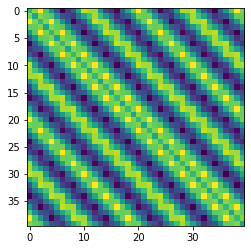

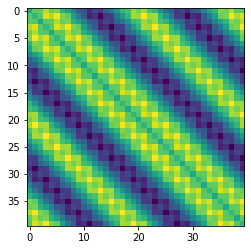

simulating perturbed machine...
Simulated beta beat, x:10.5414 %   y: 17.0631 %


/Users/ia/workspace/p4-soft/lib/elegant.py:242: RuntimeWarning: invalid value encountered in true_divide
  v = np.array(k1_a_2) / np.array(k1_a)


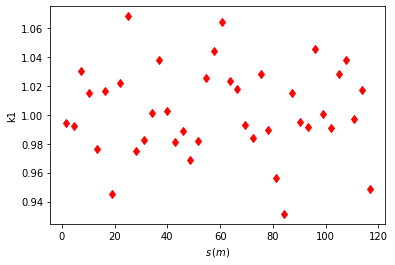

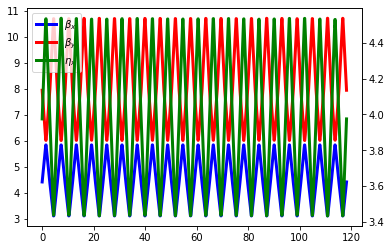

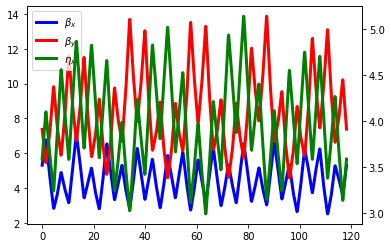

In [3]:
loco = Loco(engine='elegant')
loco.verbose = False
vis = True
print('preparing response matrices...')
loco.prepareTwiss()
if vis:
    imshow(loco.Cx)
    plt.show()
    imshow(loco.Cy)
    plt.show()

print('simulating perturbed machine...')
loco.simulateMachine()

bx, by = getBetaBeat('data/twiss','data/perturb')
print("Simulated beta beat, x:{:3.4f} %   y: {:3.4f} %".format(bx*100.,by*100.))

if vis:
    from elegant import showQuadsDiff
    showQuadsDiff(fname='data/perturb', fnameRef='data/twiss',fnameCalc='data/twiss')
    plotOptics(fname='data/twiss')
    plotOptics(fname='data/perturb')


measuring ORM with 40 correctors...
done


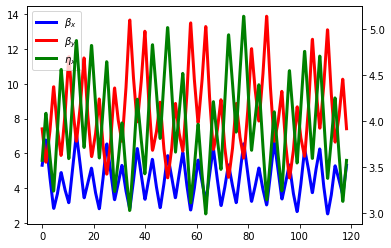

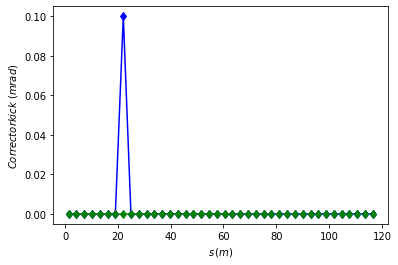

rms x [mu m]:  137.89892639946433
rms y [mu m]:  4.213428167358783
max x [mu m]:  272.9245096998675
max y [mu m]:  7.2507224885564465


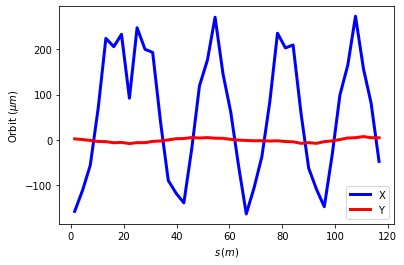

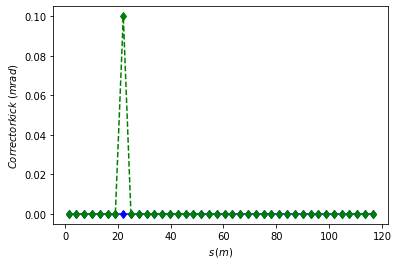

rms x [mu m]:  7.5099903101551435
rms y [mu m]:  345.2898585763736
max x [mu m]:  59.523660036101546
max y [mu m]:  546.5489229233249


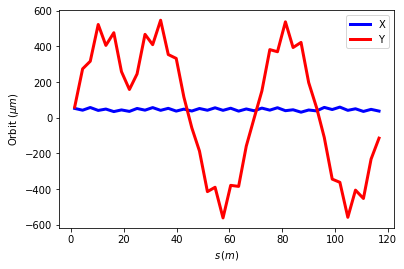

rms x [mu m]:  6.630608413427467
rms y [mu m]:  1.166023574277748
max x [mu m]:  59.2299057623954
max y [mu m]:  1.7408155181170797


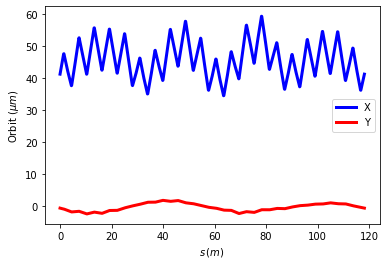

In [4]:
loco.corNames = ['CXY'+"%2.2d" % i for i in range(1,41)]
print('measuring ORM with {} correctors...'.format(len(loco.corNames)))
loco.measureOrm(kickX=1.e-4, kickY=1.e-4,mode='sim')
print('done')


if vis:
    plotOptics(fname='data/measure_orm_x')
    showCorrectors(fname='data/orm_x_CXY08',fnameCalc='data/twiss', ipage=0)
    plotOrb(fname='data/orm_x_CXY08',  idx=0)
    showCorrectors(fname='data/orm_y_CXY08', fnameCalc='data/twiss', ipage=0)
    plotOrb(fname='data/orm_y_CXY08',  idx=0)
    plotOrb(fname='data/perturb',  idx=0)


In [5]:
# analyze - build matrix
from loco import ORM, buildOrm
names = ['data/orm_x_CXY'+"%2.2d" % i for i in range(1,41)]
ormx, ore = buildOrm(names,'data/perturb', plane='x', dkick=1.e-4)
names = ['data/orm_y_CXY'+"%2.2d" % i for i in range(1,41)]
ormy, ore = buildOrm(names,'data/perturb', plane='y', dkick=1.e-4)

building ORM 40 40
reading data/orm_x_CXY01.clo
reading data/orm_x_CXY02.clo
reading data/orm_x_CXY03.clo
reading data/orm_x_CXY04.clo
reading data/orm_x_CXY05.clo
reading data/orm_x_CXY06.clo
reading data/orm_x_CXY07.clo
reading data/orm_x_CXY08.clo
reading data/orm_x_CXY09.clo
reading data/orm_x_CXY10.clo
reading data/orm_x_CXY11.clo
reading data/orm_x_CXY12.clo
reading data/orm_x_CXY13.clo
reading data/orm_x_CXY14.clo
reading data/orm_x_CXY15.clo
reading data/orm_x_CXY16.clo
reading data/orm_x_CXY17.clo
reading data/orm_x_CXY18.clo
reading data/orm_x_CXY19.clo
reading data/orm_x_CXY20.clo
reading data/orm_x_CXY21.clo
reading data/orm_x_CXY22.clo
reading data/orm_x_CXY23.clo
reading data/orm_x_CXY24.clo
reading data/orm_x_CXY25.clo
reading data/orm_x_CXY26.clo
reading data/orm_x_CXY27.clo
reading data/orm_x_CXY28.clo
reading data/orm_x_CXY29.clo
reading data/orm_x_CXY30.clo
reading data/orm_x_CXY31.clo
reading data/orm_x_CXY32.clo
reading data/orm_x_CXY33.clo
reading data/orm_x_CXY34

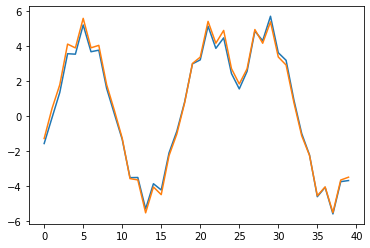

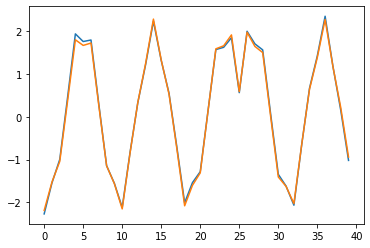

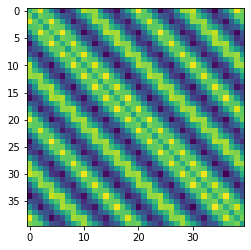

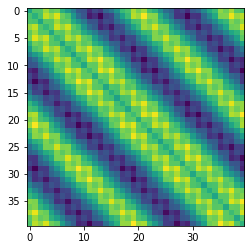

In [6]:
# analyze -- plots

#plt.imshow( np.abs( (orm.R - C) / orm.R ) )
#np.set_printoptions(precision=3)
from pylab import *
plt.plot( (ormy.Ryy[25]))
plt.plot( (loco.Cy[25]))
plt.show()
plt.plot( (ormx.Rxx[25]))
plt.plot( (loco.Cx[25]))
plt.show()
plt.imshow(ormx.Rxx)
plt.show()
plt.imshow(ormy.Ryy)

In [8]:
# analyze???
from elegant import getQuadFamilies
quad_dict,quad_vals = getQuadFamilies('data/twiss')
quads = [ k for k in quad_dict.keys()]
print(f"Quadrupoles:{quads}")

iq = 2
print(quads[iq], quad_dict[quads[iq]])
print(quad_vals[quads[iq],1])
print(quad_vals[quads[iq],6])


Quadrupoles:['QF', 'QS', 'QD']
QD 20
-2.1
-2.1


In [9]:
import os,sys
def computeOpticsD(quad_name, quad_id,k1):
    ex = '/Users/ia/Products/elegant/darwin-x86/elegant'
    args =  ' compute_optics_d.ele -macro=lattice=fodo,quad_name='+quad_name+',quad_id='+str(quad_id)+',k1='+str(k1)
    args += ',dir=data'
    os.system(ex + args)

In [10]:
%%time
# sequential version, this takes long:
# optimize with parallelization and separate function
# prepare

dk = 0.001
quad_names = quads 
for qname in quad_names:
    print('generating response to {}, n={}'.format(qname, quad_dict[qname]))
    #nq = 5
    nq = quad_dict[qname]+1
    for i in range(1,nq):
        computeOpticsD(qname,i, quad_vals[qname,i] + dk)

generating response to QF, n=20
Running elegant at Sun Feb 20 20:40:03 2022

This is elegant 2021.4.0, Nov 19 2021, by M. Borland, J. Calvey, M. Carla', N. Carmignani, AJ Dick, Z. Duan, M. Ehrlichman, L. Emery, W. Guo, R. Lindberg, V. Sajaev, R. Soliday, Y.-P. Sun, C.-X. Wang, Y. Wang, Y. Wu, and A. Xiao.
Thanks for using elegant.  Please cite the following reference in your publications:
  M. Borland, "elegant: A Flexible SDDS-Compliant Code for Accelerator Simulation,"
  Advanced Photon Source LS-287, September 2000.
If you use a modified version, please indicate this in all publications.
Link date: Nov 19 2021 12:43:21, SVN revision: 28200:28201M
statistics:    ET:     00:00:00 CP:    0.01 BIO:0 DIO:0 PF:0 MEM:0
&global_settings
    inhibit_fsync = 0,
    allow_overwrite = 1,
    echo_namelists = 0,
    mpi_randomization_mode = 3,
    exact_normalized_emittance = 0,
    SR_gaussian_limit = 3.000000000000000e+00,
    inhibit_seed_permutation = 0,
    log_file = data/out.log,
    erro

In [11]:
from loco import getTheorOrm, getOrm
from pylab import *

#C0x, C0y = get_theor_orm(fname='twiss')
C0x = getOrm(fname='data/twiss.hrm')
C0y = getOrm(fname='data/twiss.vrm')
C0xy = getOrm(fname='data/twiss.hvrm')
C0yx = getOrm(fname='data/twiss.vhrm')

dk = 0.001
dCx = []
dCy = []
dCxy = []
dCyx = []
quad_names = quads 
for qname in quad_names:
    nquad = quad_dict[qname]
    #nquad = 5
    print('loading response to:',qname)
    for i in range(1,nquad+1):
        #fname = 'optics_'+qname+'_'+str(i)
        fname = 'data/' + qname+'_'+str(i)
        C1x = getOrm(fname=fname + '.hrm')
        C1y = getOrm(fname=fname + '.vrm')
        C1xy = getOrm(fname=fname + '.hvrm')
        C1yx = getOrm(fname=fname + '.vhrm')

        #C1x,C1y = get_theor_orm(fname=fname)
        dCx.append( (C1x-C0x)/ dk)
        dCy.append( (C1y-C0y)/ dk)
        dCxy.append( (C1xy-C0xy)/ dk)
        dCyx.append( (C1yx-C0yx)/ dk)

loading response to: QF
loading response to: QS
loading response to: QD


5.717478593266686e-11


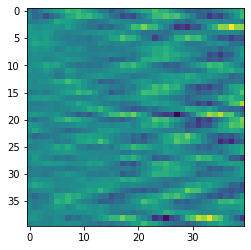

In [12]:
print(np.max(dCxy[43]))
plt.imshow(dCxy[43])

In [13]:
#A, B = build_matrix(ormx, ormy, C0x, C0x, C0x, dCx, dCy, dCxy, Cyx, ormx, ormy, )


Nk = len(dCx) #number of free parameters
Nm = 40 # number of measurements
print('NK:', Nk)
print('Nm:', Nm)
Ax = np.zeros([Nk,Nk])
Ay = np.zeros([Nk,Nk])
Axy = np.zeros([Nk,Nk])
Ayx = np.zeros([Nk,Nk])

A = np.zeros([4*Nk,Nk])

Bx = np.zeros([Nk,1])
By = np.zeros([Nk,1])
Bxy = np.zeros([Nk,1])
Byx = np.zeros([Nk,1])

B = np.zeros([4*Nk,1])

Dx = (ormx.Rxx[0:Nm,:] - C0x[0:Nm,:])
Dy = (ormy.Ryy[0:Nm,:] - C0y[0:Nm,:])
Dxy = (ormx.Rxy[0:Nm,:] - C0xy[0:Nm,:])
Dyx = (ormy.Ryx[0:Nm,:] - C0yx[0:Nm,:])

for i in range(Nk):
    #print('done A:', 100.* i / Nk,'%')
    for j in range(Nk):
        Ax[i,j] = np.sum(np.dot(dCx[i],dCx[j].T) )
        Ay[i,j] = np.sum(np.dot(dCy[i],dCy[j].T) )
        Axy[i,j] = np.sum(np.dot(dCxy[i],dCxy[j].T) )
        Ayx[i,j] = np.sum(np.dot(dCyx[i],dCyx[j].T) )
    A[i,:] = Ax[i,:]
    A[i+Nk,:] = Ay[i,:]
    A[i+2*Nk,:] = Axy[i,:]
    A[i+3*Nk,:] = Ayx[i,:]
        

for i in range(Nk):
    Bx[i] = np.sum( np.dot(dCx[i], Dx.T) )
    By[i] = np.sum( np.dot(dCy[i], Dy.T) )
    Bxy[i] = np.sum( np.dot(dCxy[i], Dxy.T) )
    Byx[i] = np.sum( np.dot(dCyx[i], Dyx.T) )
    B[i] = Bx[i]
    B[i+Nk] = By[i]
    B[i+2*Nk] = Bxy[i]
    B[i+3*Nk] = Byx[i]


NK: 60
Nm: 40


number of singular values 60
(240, 60) (240, 1) (240, 240) (240, 60) (60, 60)


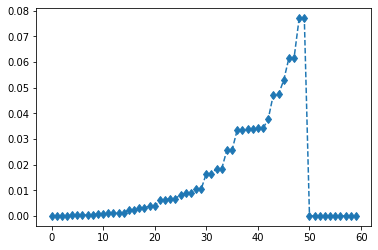

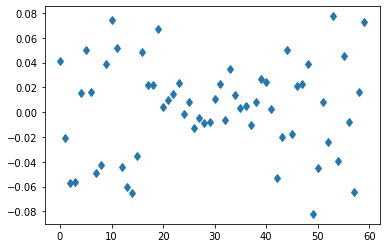

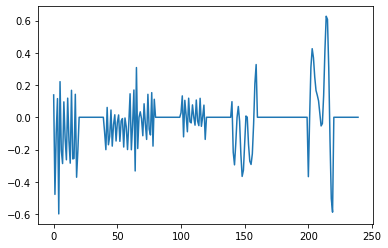

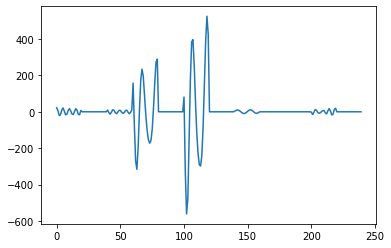

In [14]:
#A = np.zeros( [Ax.shape[0] +Ax.shape[0],  Ay.shape[1] ] )
#B = np.zeros( [Bx.shape[0] + By.shape[0], 1 ] )

#w = 1.0

#for i in range(Nk):
#    B[i] = w*Bx[i]/Nk
#    B[i+Nk] = By[i]/Nk
#    for j in range(Nk):
#        A[i,j] = w*Ax[i,j]/Nk
#        A[i+Nk,j] = Ay[i,j]/Nk

#A = Ax
#B = Bx

# imporovement: svd cut through numpy
u,s,v=np.linalg.svd(A,  full_matrices=True)
#u,s,v=np.linalg.svd(A)

smat = 0.0 * A
si = s**-1
n_sv = 50
si[n_sv:] *= 0.0
print("number of singular values {}".format(len(si)))
smat[:Nk,:Nk] = np.diag(si)


print(A.shape, B.shape, u.shape, smat.shape, v.shape)


plt.plot(si,'d--')
plt.show()

Ai=np.dot(v.transpose(),np.dot(smat.transpose(),u.transpose()))

#Ai = np.linalg.inv(A)

r = ( np.dot(Ai,B)).reshape(-1)
plot(r,'d')
plt.show()

e = np.dot(A,r).reshape(-1) - B.reshape(-1)
plt.plot(e)
plt.show()
plt.plot(B)
plt.show()

11943
Running elegant at Sun Feb 20 20:42:53 2022

This is elegant 2021.4.0, Nov 19 2021, by M. Borland, J. Calvey, M. Carla', N. Carmignani, AJ Dick, Z. Duan, M. Ehrlichman, L. Emery, W. Guo, R. Lindberg, V. Sajaev, R. Soliday, Y.-P. Sun, C.-X. Wang, Y. Wang, Y. Wu, and A. Xiao.
Thanks for using elegant.  Please cite the following reference in your publications:
  M. Borland, "elegant: A Flexible SDDS-Compliant Code for Accelerator Simulation,"
  Advanced Photon Source LS-287, September 2000.
If you use a modified version, please indicate this in all publications.
Link date: Nov 19 2021 12:43:21, SVN revision: 28200:28201M
statistics:    ET:     00:00:00 CP:    0.01 BIO:0 DIO:0 PF:0 MEM:0
&global_settings
    inhibit_fsync = 0,
    allow_overwrite = 1,
    echo_namelists = 1,
    mpi_randomization_mode = 3,
    exact_normalized_emittance = 0,
    SR_gaussian_limit = 3.000000000000000e+00,
    inhibit_seed_permutation = 0,
    log_file = data/out.log,
    error_log_file = {NULL},
    s

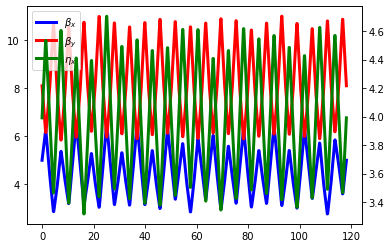

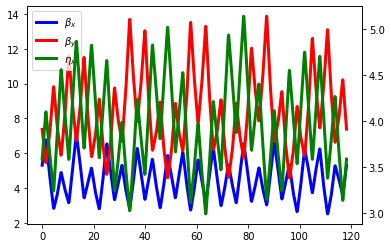

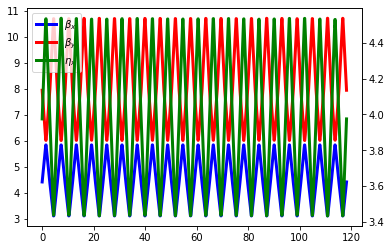

Beta beat before correction, x:10.5414 %   y: 17.0631 %
Beta beat after correction, x:6.9502 %   y: 1.5951 %


In [16]:
# check correction...

quad_names = quad_names
iq = 0
frac = 1.0
cor_dict = {}
for qname in quad_names:
    nquad = quad_dict[qname]
    #print(qname, quad_dict[qname])
    for i in range(0, nquad):
        cor_dict[qname, i+1] = -r[iq]*frac
        iq += 1


import sdds
x2 = sdds.SDDS(0)
x2.load('data/perturb.param')
ipage = 0
n_list = len(x2.columnData[0][ipage])
print(n_list)

for idx in range(n_list):
    ename = x2.columnData[0][ipage][idx] # ElementName
    par = x2.columnData[1][ipage][idx] #ElementParameter
    evl = x2.columnData[2][ipage][idx] #ParameterValue
    etype = x2.columnData[4][ipage][idx] #ElementType
    eocc = x2.columnData[5][ipage][idx] #ElementOcuurance
    if etype in ['KQUAD'] and ename in quad_names:
        if par == "K1":
            #print('K2:', ename, etype, evl, eocc) #ParameterValue
            dk = cor_dict[ename,eocc]
            #print('modifying',evl, evl+dk)
            x2.columnData[2][ipage][idx] = evl+dk
 
x2.save('data/check.param')

! /Users/ia/Products/elegant/darwin-x86/elegant check_correction.ele -macro=lattice=fodo
from loco import plotOptics
plotOptics(fname='data/check_correction')
plotOptics(fname='data/perturb')
plotOptics(fname='data/twiss')

bx, by = getBetaBeat('data/twiss','data/perturb')
print("Beta beat before correction, x:{:3.4f} %   y: {:3.4f} %".format(bx*100.,by*100.))

bx, by = getBetaBeat('data/twiss','data/check_correction')
print("Beta beat after correction, x:{:3.4f} %   y: {:3.4f} %".format(bx*100.,by*100.))
